#### [1] (i) Define un tipo compósito de Julia Intervalo para representar un intervalo de dos números reales, que incluya redondeo dirigido. Por el momento supongamos que todos los elementos serán de tipo BigFloat.

####Para ello, deberás definir constructores que acepten cadenas y/o números.

####(ii) Implementa las operaciones básicas sobre intervalos.

####(iii) Limpia tu código para reducir la repetición de código, al sacar cada vez código en común a una función por separado.

#### [2] Haz un módulo de Julia llamado Intervalos en un archivo intervalos.jl, que contiene todas las definiciones anteriores.

#### Adjunto lo que se encuentra contenido en el archivo Intervalos.jl con las soluciones de los literales anteriores

In [1]:
using Intervalos

In [2]:
using FactCheck

In [3]:
include("IntervalosTest.jl")

Prueba: Aritmética de intervalos
6 facts verified.


delayed_handler (generic function with 4 methods)

#### adjunto el contenido del archivo IntervalosTest.jl

##Operaciones con intervalos

#### [4] Utiliza tu código para rehacer el cálculo de π del notebook 5. Ahora, ¡deberá ser mucho más fácil! ¿Cuál es la diferencia entre el cálculo mediante intervalos y el cálculo original que hicimos?

In [9]:
suma=Intervalo(0.0);

for i in 1:10000
    iteracion=Intervalo(i)
    denom=iteracion*iteracion;
    suma+= Intervalo(1)/(denom)
end
suma

Intervalo(1.644834071848059769806081833310310903537997519496841753090202417348766370567907e+00 with 256 bits of precision,1.644834071848059769806081833310310903537997519496841753090202417348766370740388e+00 with 256 bits of precision)

In [10]:
S=Intervalo(suma.inf+1/(10001), suma.sup+(1/10000))

Intervalo(1.644934061849059669821510788046274077554430705394609296882927026723766370567907e+00 with 256 bits of precision,1.644934071848059769810874006912696833136310460876686895454704370473766370740388e+00 with 256 bits of precision)

#### No hay diferencia, ya que en ambos se cálcula el valor de S² implementando redondeo hacia arriba y hacia abajo

#### [5] (i) Define la potencia para intervalos. 

#### se incluyó la potencia para intervalos en el archivo Intervalos.jl

####(ii) Para el intervalo X=[−1,1], calcula X⋅X y X² (donde ⋅ denota la multiplicación de intervalos). ¿Qué observas?

In [2]:
Intervalo(-1,1)*Intervalo(-1,1)

Intervalo(-1e+00 with 256 bits of precision,1e+00 with 256 bits of precision)

In [3]:
a=Intervalo(-1,1)

Intervalo(-1e+00 with 256 bits of precision,1e+00 with 256 bits of precision)

In [5]:
a^2.0

Intervalo(0e+00 with 256 bits of precision,1e+00 with 256 bits of precision)

#### (iii) Calcula [−1,1]⋅([−1,0]+[3,4]) y [−1,1]⋅[−1,0]+[−1,1]⋅[3,4]. ¿Qué observas?

In [6]:
Intervalo(-1,1)*(Intervalo(-1,0)+Intervalo(3,4))

Intervalo(-4e+00 with 256 bits of precision,4e+00 with 256 bits of precision)

In [8]:
Intervalo(-1,1)*Intervalo(-1,0)+Intervalo(-1,1)*Intervalo(3,4)

Intervalo(-5e+00 with 256 bits of precision,5e+00 with 256 bits of precision)

In [9]:
# La multiplicación no es distributiva ante la suma

#### [6] Con las operaciones definidas en Julia, podemos insertar intervalos en cálculos sencillos.

####(i) Define una función polinomial p1(x):=(x−1)(x−2) y (ii) ¿Cómo se puede mandar a p1 un intervalo como argumento?

In [12]:
function p1(x::Intervalo)
(x-Intervalo(1))*(x-Intervalo(2))  
end

p1 (generic function with 1 method)

In [22]:
x=Intervalo(5,15)

Intervalo(5e+00 with 256 bits of precision,1.5e+01 with 256 bits of precision)

In [23]:
p1(x)

Intervalo(1.2e+01 with 256 bits of precision,1.82e+02 with 256 bits of precision)

####(iii) ¿Qué representa el resultado?

In [24]:
#el resultado representa los valores que puede tomar p1(x) en el intervalo [5,15]. Sin embargo, para obtener todos
#los posibles valores de p1(x) en dicho intervalo, es necesario definir un arreglo y un ciclo for, como sigue

In [28]:
# versión comprimida
comp=p1(Intervalo(-1,1.5))

Intervalo(-1.5e+00 with 256 bits of precision,6e+00 with 256 bits of precision)

In [87]:
#redefinimos p1(x) para usarlo en el arreglo
function p1b(x::Number)
(x-1)*(x-2)   
end

p1b (generic function with 1 method)

In [89]:
#versión extendida
ext=[p1b(x) for x in -1:0.125:1.5]

21-element Array{Float64,1}:
  6.0     
  5.39063 
  4.8125  
  4.26563 
  3.75    
  3.26563 
  2.8125  
  2.39063 
  2.0     
  1.64063 
  1.3125  
  1.01563 
  0.75    
  0.515625
  0.3125  
  0.140625
 -0.0     
 -0.109375
 -0.1875  
 -0.234375
 -0.25    

In [32]:
#Cabe resaltar que en la lista anterior faltan algunos valores que no se calculan por la definición de la potencia de 
#intervalos

#### (iv) Juega con distintos intervalos como entrada y dibuja los resultados. ¿Qué observas?

In [34]:
using PyPlot

In [37]:
function grafica1D(a,b,f::Function)
    puntosX=(-5:0.125:5)
    puntosY=similar(puntosX)
    
    for i=1:length(puntosX)
        puntosY[i]=f(puntosX[i])   #referencia fija
    end
    
    ptsX=(a:0.125:b)
    ptsY=similar(ptsX)            #la función evaluada en cada elemento del dominio
    for i=1:length(ptsX)
    ptsY[i]=f(ptsX[i])
    end
    
    polY=f(Intervalo(a,b))        #la función evaluada en el intervalo
    PyPlot.plot(puntosX,puntosY,"r",linewidth=1)
    PyPlot.plot(ptsX, ptsY, "g", linewidth=2.0)
    
    PyPlot.plot((a-1)*[1,1],float64([polY.inf,polY.sup]), "black", linewidth=2.0)    
    PyPlot.plot([a-1,a],float64(polY.inf)*[1,1],"black", linewidth=1.0, linestyle="--")
    PyPlot.plot([a-1,a],float64(polY.sup)*[1,1], "black", linewidth=1.0, linestyle="--")
    

    PyPlot.fill_between([a,b],float64(polY.inf),float64(polY.sup),color="lightgray")
    PyPlot.suptitle("La línea negra es f([$a,$b]), la zona grís representa el dominio y el codominio de la función sobre el intervalo, línea verde es f(x) donde x es un número del intervalo [$a,$b]")
   
end

grafica1D (generic function with 1 method)

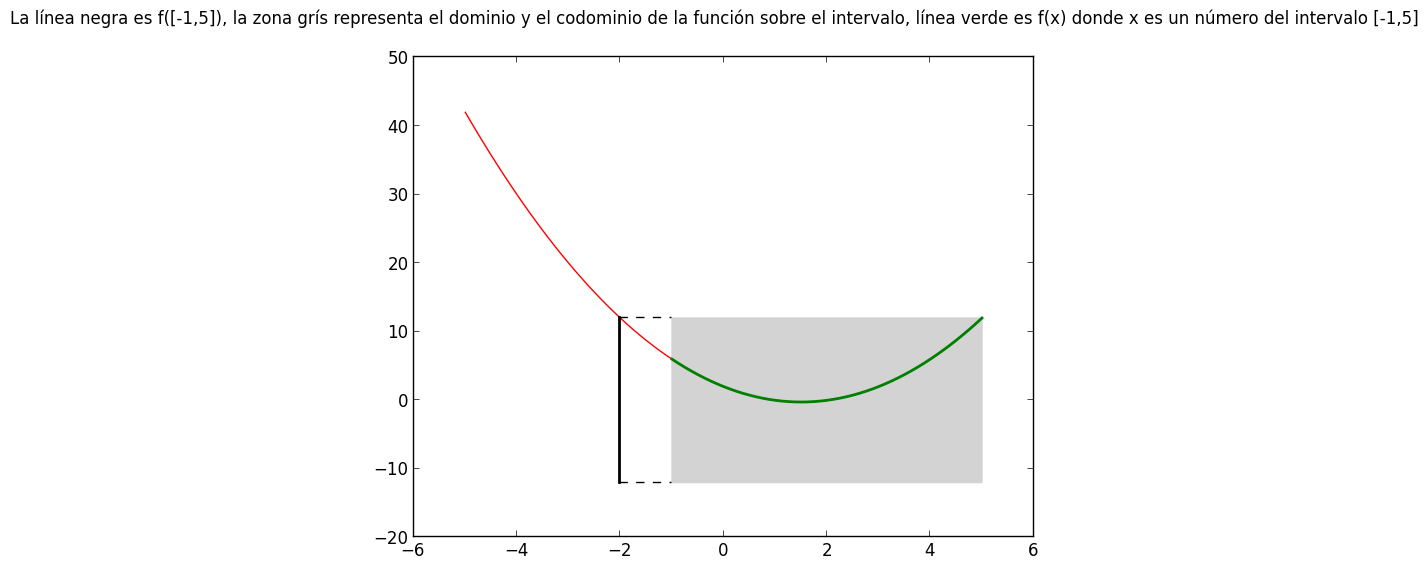

In [90]:
grafica1D(-1,5,p1);

In [91]:
p1(Intervalo(-1,5))

Intervalo(-1,2e+01 with 256 bits of precision,1,2e+01 with 256 bits of precision)

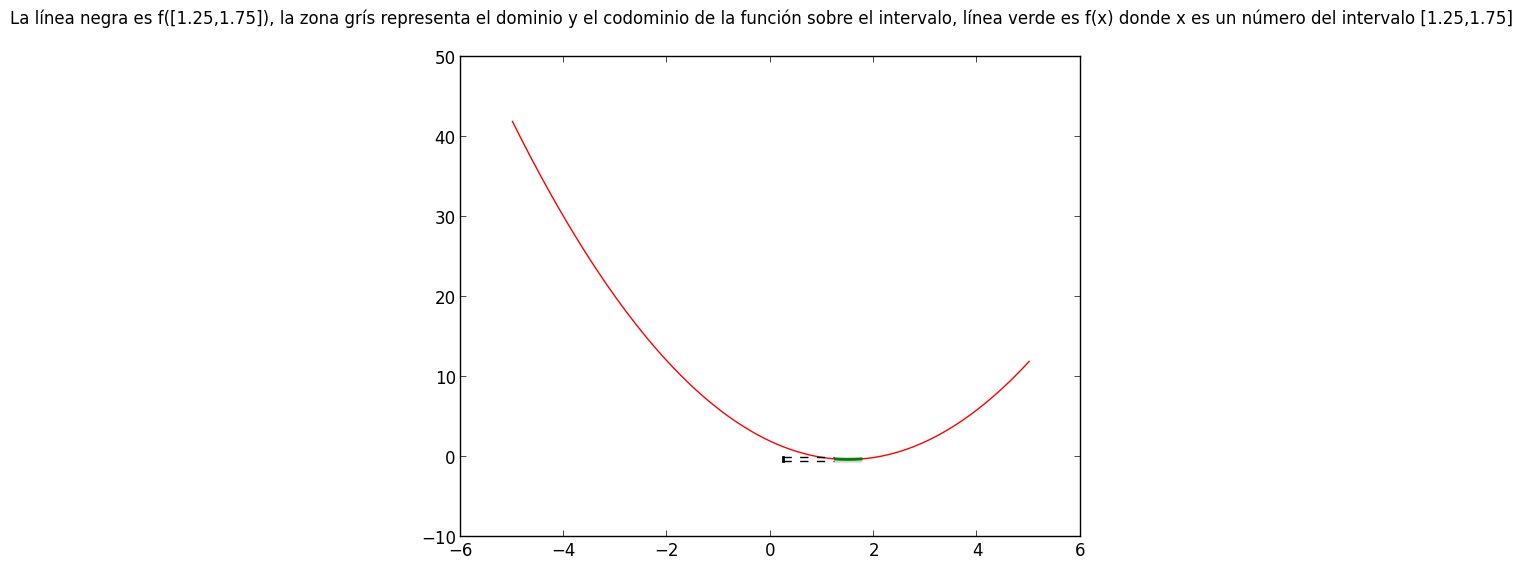

In [97]:
grafica1D(1.25,1.75,p1);

In [94]:
p1(Intervalo(1.25,1.75))

Intervalo(-5,625e-01 with 256 bits of precision,-6,25e-02 with 256 bits of precision)

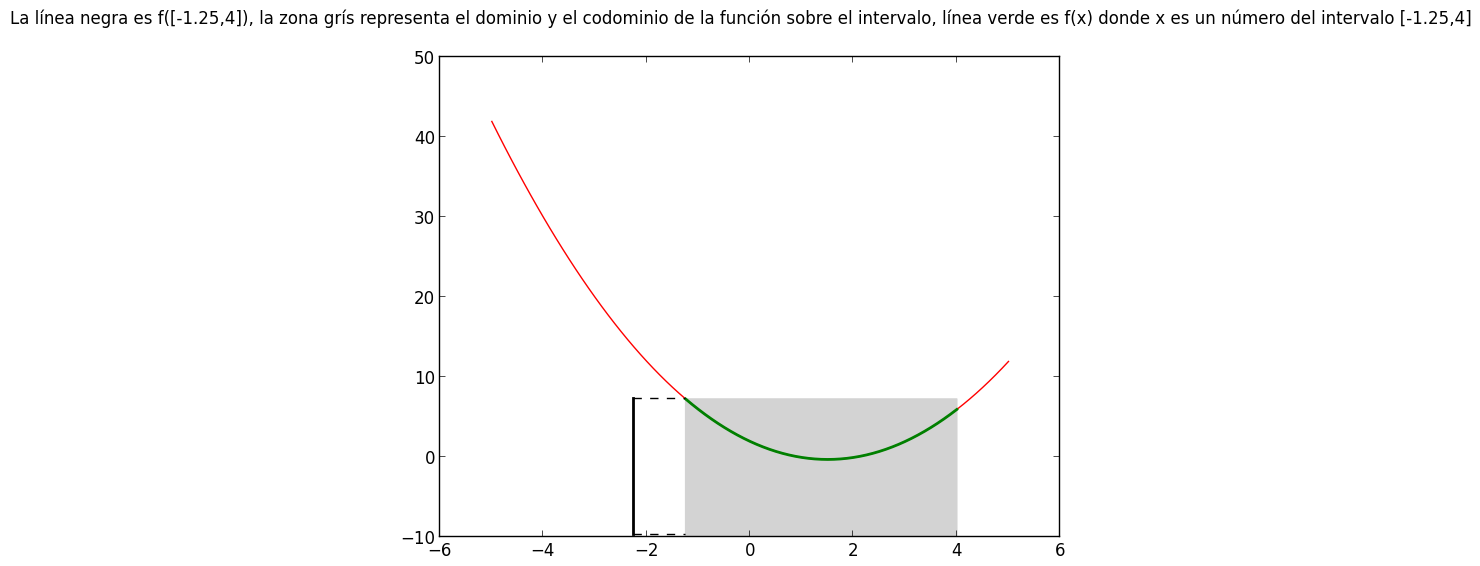

In [98]:
grafica1D(-1.25,4,p1);

In [100]:
p1(Intervalo(-1.25,4))

Intervalo(-9,75e+00 with 256 bits of precision,7,3125e+00 with 256 bits of precision)

#### (v) ¿Qué pasa si reescribes p1 en una forma equivalente? ¿En otra forma equivalente?

In [101]:
function p_1(x::Intervalo)
    x^2-Intervalo(3)*x+Intervalo(2) 
end

function p_1(x::Float64)
x^2-3*x+2  #el polinomio para intervalos 
end

p_1 (generic function with 2 methods)

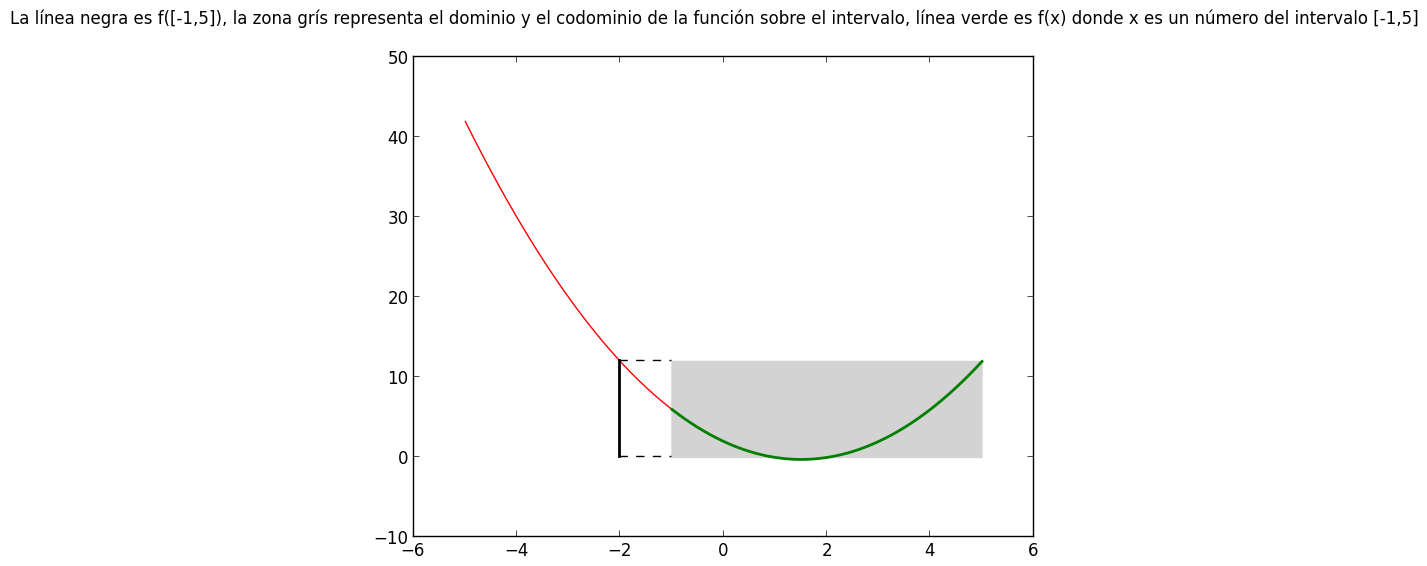

In [103]:
grafica1D(-1,5,p_1);

In [104]:
p_1(Intervalo(-1,5))

Intervalo(-0e+00 with 256 bits of precision,1,2e+01 with 256 bits of precision)

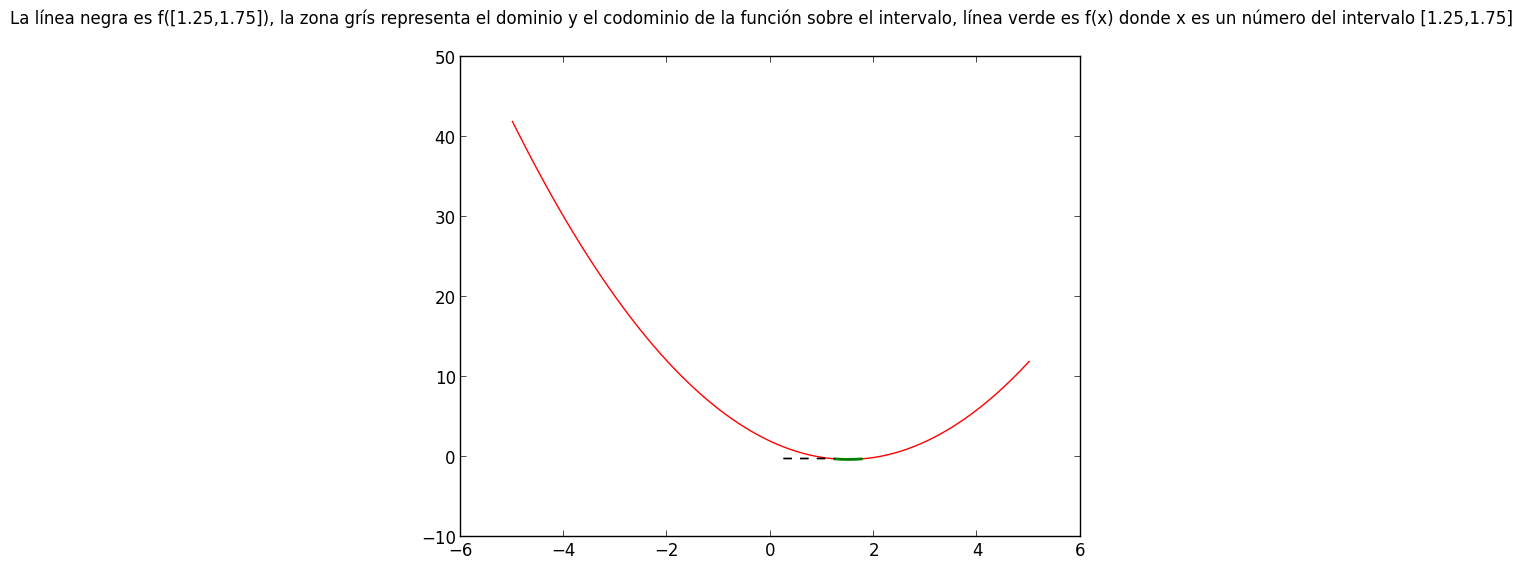

In [105]:
grafica1D(1.25,1.75,p_1);

In [106]:
p_1(Intervalo(1.25,1.75))

Intervalo(-1,875e-01 with 256 bits of precision,-1,875e-01 with 256 bits of precision)

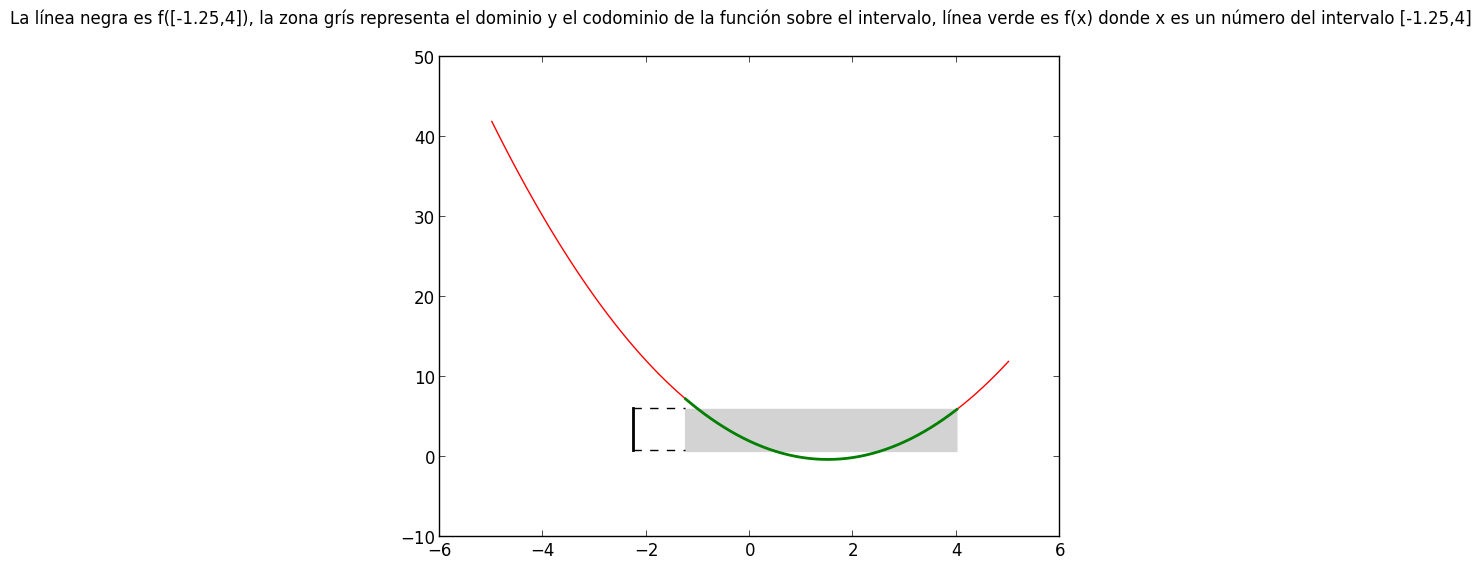

In [109]:
grafica1D(-1.25,4,p_1);

In [110]:
p_1(Intervalo(-1.25,4))

Intervalo(7,5e-01 with 256 bits of precision,6e+00 with 256 bits of precision)

In [66]:
#al usar el polinomio expandido disminuye el rango

#### (vi) Pensando en este ejemplo de polinomios, ¿para qué nos sirven los intervalos?

#### [7] (i) Haz una implementación de tu idea de la pregunta [6].

In [69]:
#en este caso la función tiene un mínimo en -0.25 obtenida en 6.iii y no está acotada por arriba
p1a(x::Intervalo)= Intervalo(max(p1(x).inf,-0.25,min(p1(x).sup,inf(BigFloat)))
p1a(x::Number)=p1(x)

p1a (generic function with 3 methods)

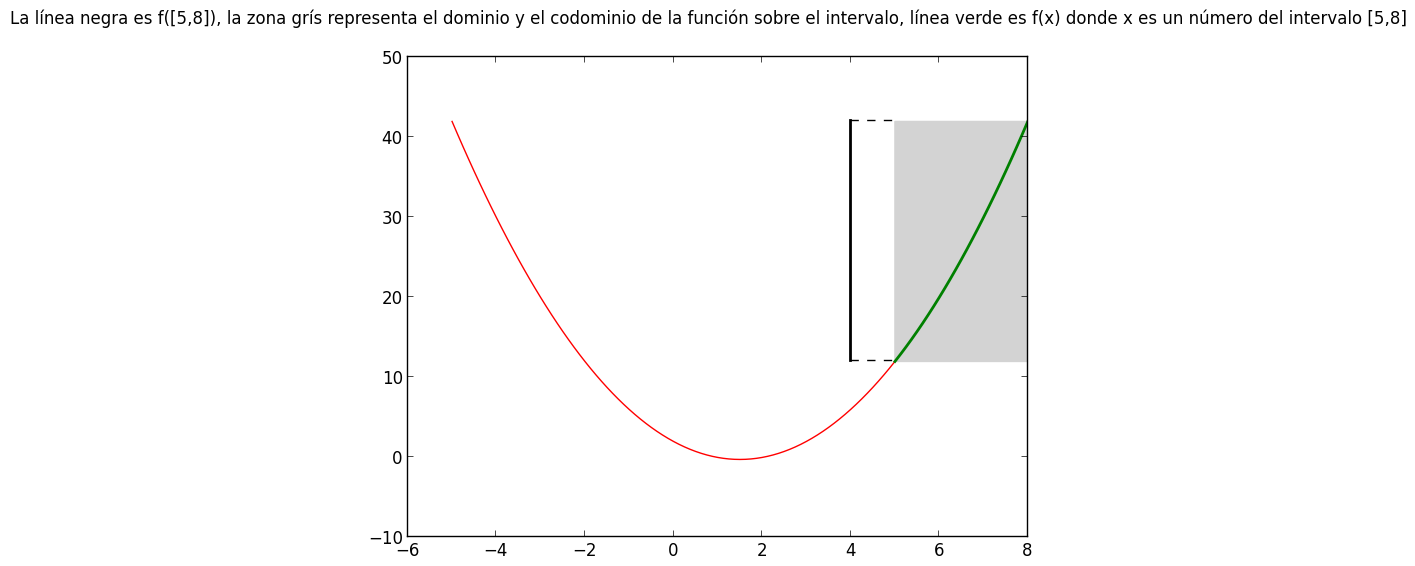

PyObject <matplotlib.text.Text object at 0x10aa4b10>

In [70]:
grafica1D(5,8,p1a)

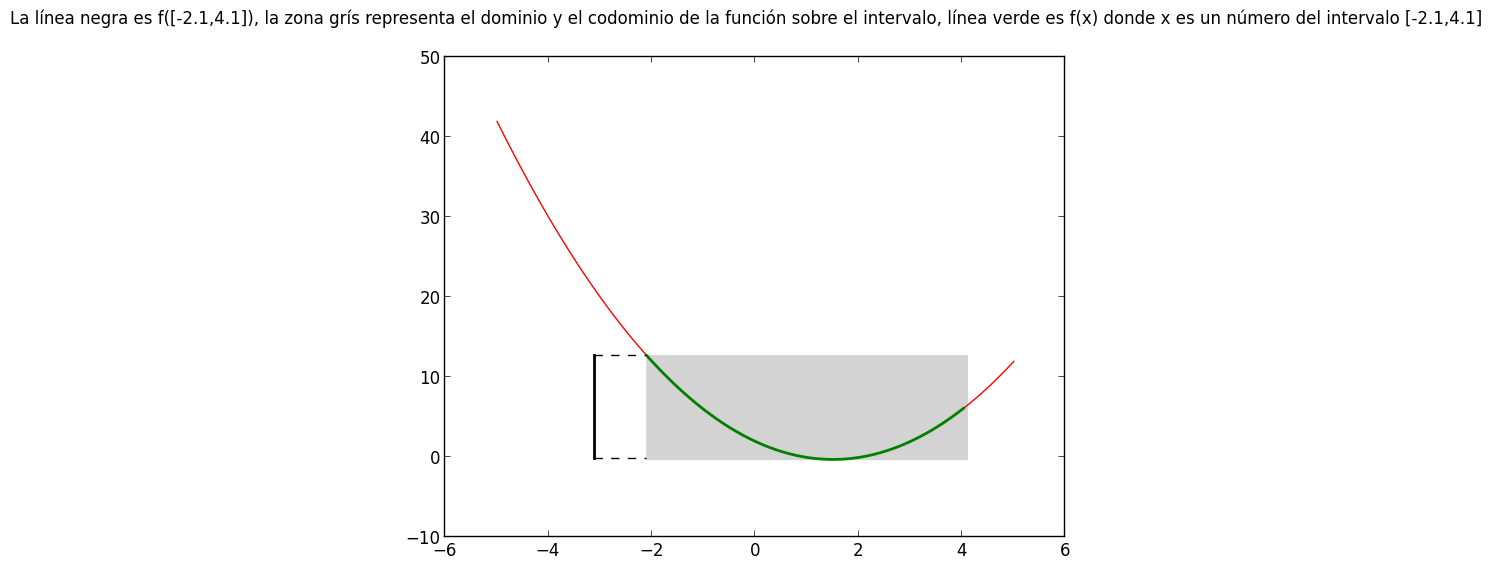

PyObject <matplotlib.text.Text object at 0x11153e10>

In [71]:
grafica1D(-2.1,4.1,p1a)

#### (ii) Pruébalo con p2(x):=x²−2.

In [77]:
function p2(x::Intervalo)
x^2-Intervalo(2)  
end

function p2(x::Number)
x^2-2  
    
end

p2a(x::Intervalo)= Intervalo(max(p2(x).inf,-2)  , min(p2(x).sup,inf(BigFloat)) )
p2a(x::Number)= p2(x)

p2a (generic function with 2 methods)

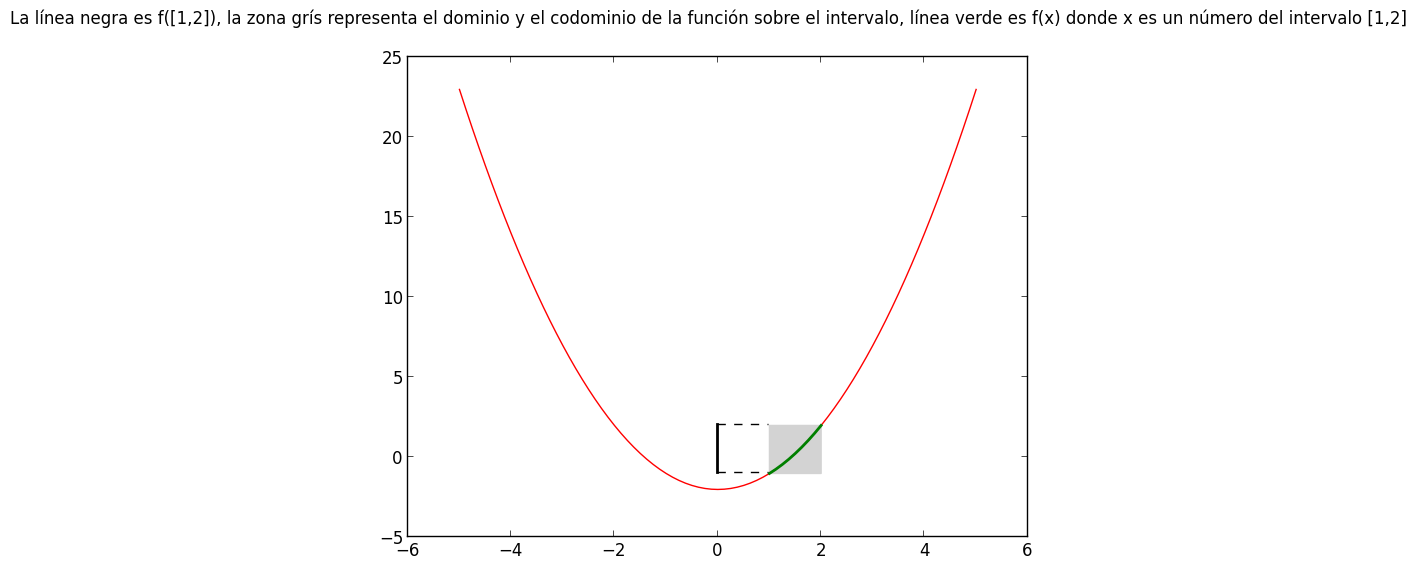

PyObject <matplotlib.text.Text object at 0x11373690>

In [78]:
grafica1D(1,2,p2a)

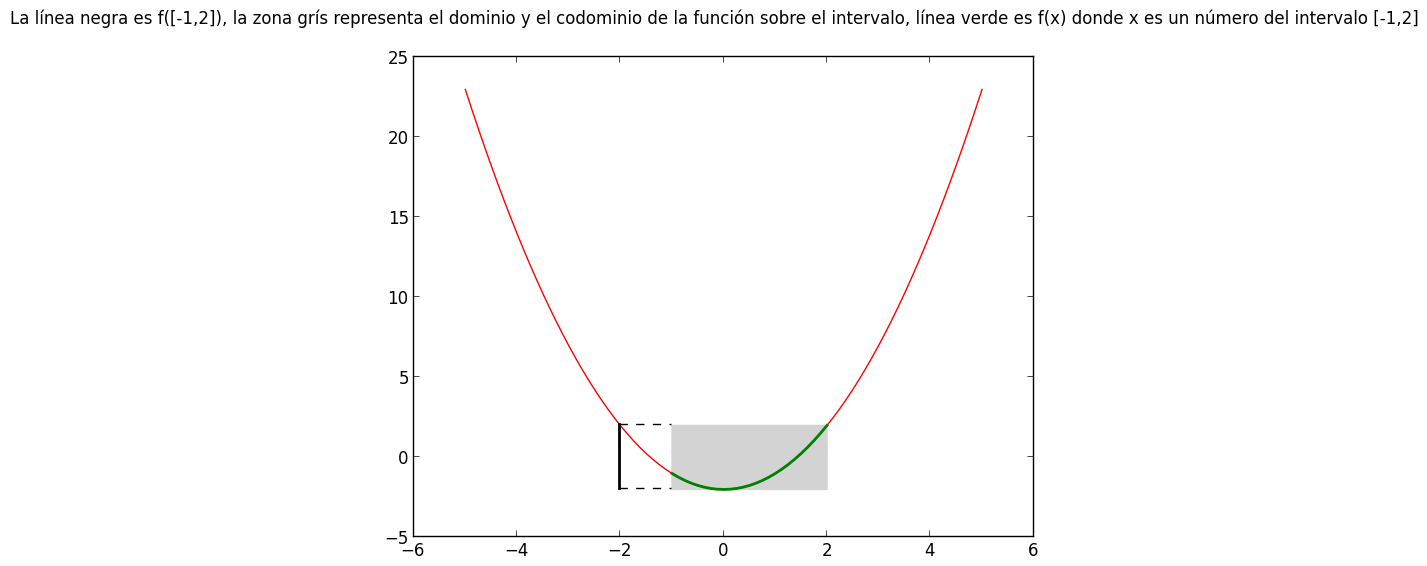

PyObject <matplotlib.text.Text object at 0xe1b7f50>

In [111]:
grafica1D(-1,2,p2a)

#### (iii) Pruébalo con otros polinomios.

In [112]:
function p3(x::Intervalo)
    (x-Intervalo(sqrt(2)))*(x+Intervalo(sqrt(2)))  
end

function p3(x::Number)
    (x-sqrt(2))*(x+sqrt(2))  
    
end

p3a(x::Intervalo)= Intervalo(max(p3(x).inf,-2),min(p3(x).sup,inf(BigFloat)) )
p3a(x::Number)= p3(x)

p3a (generic function with 2 methods)

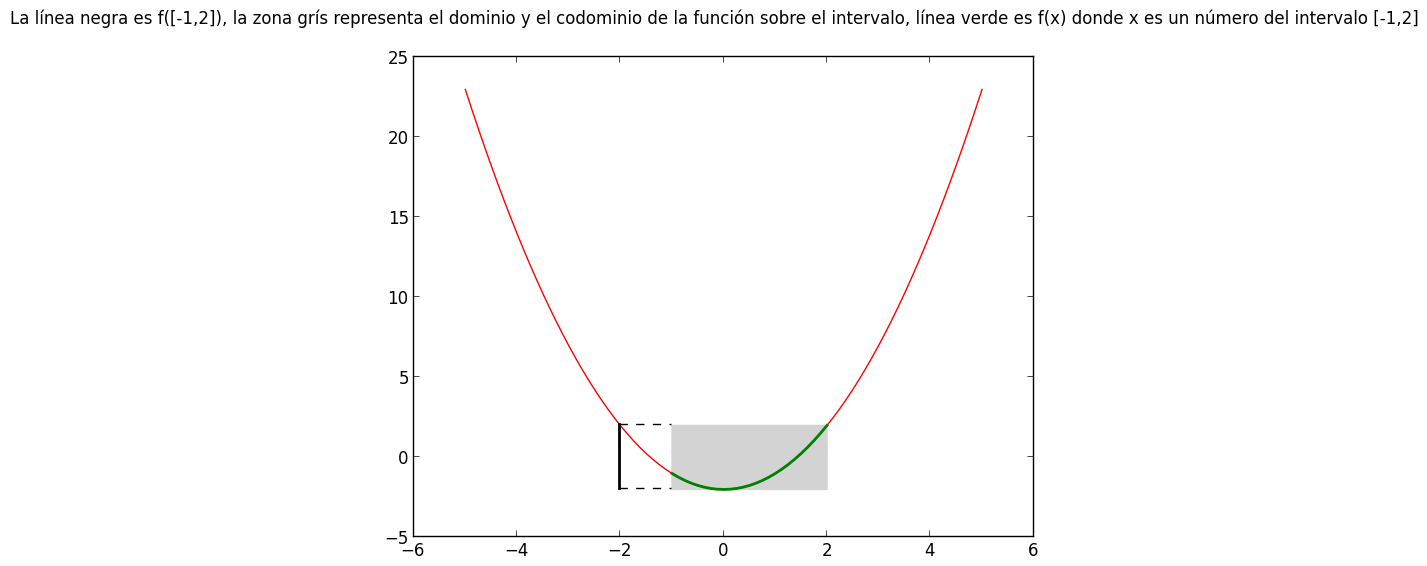

PyObject <matplotlib.text.Text object at 0xe6e8a50>

In [113]:
grafica1D(-1,2,p3a) 

In [114]:
function p4(x::Intervalo)
    x*(x^2+Intervalo(2)*x+Intervalo(1)) 
end

function p4(x::Number)
     x*(x^2+2*x+1)  
    
end

p4a(x::Intervalo)= Intervalo( max(p4(x).inf,-inf(BigFloat))  , min(p4(x).sup,inf(BigFloat)) )
p4a(x::Number)= p4(x)

p4a (generic function with 2 methods)

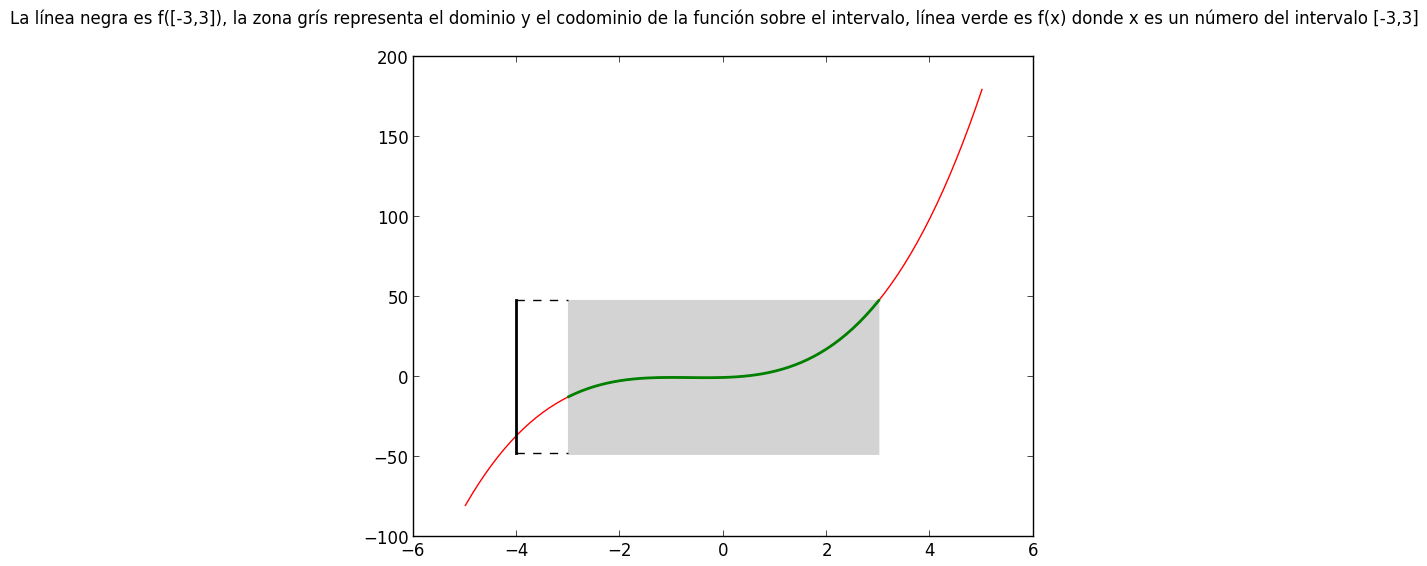

PyObject <matplotlib.text.Text object at 0x1019a490>

In [116]:
grafica1D(-3,3,p4a)